The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#####
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
df.species.nunique()

3

In [13]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<h2>EDA</h2> 

<Axes: xlabel='species', ylabel='count'>

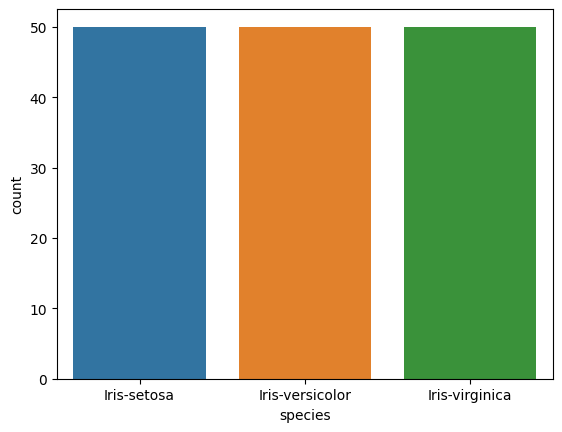

In [14]:
sns.countplot(x=df["species"])

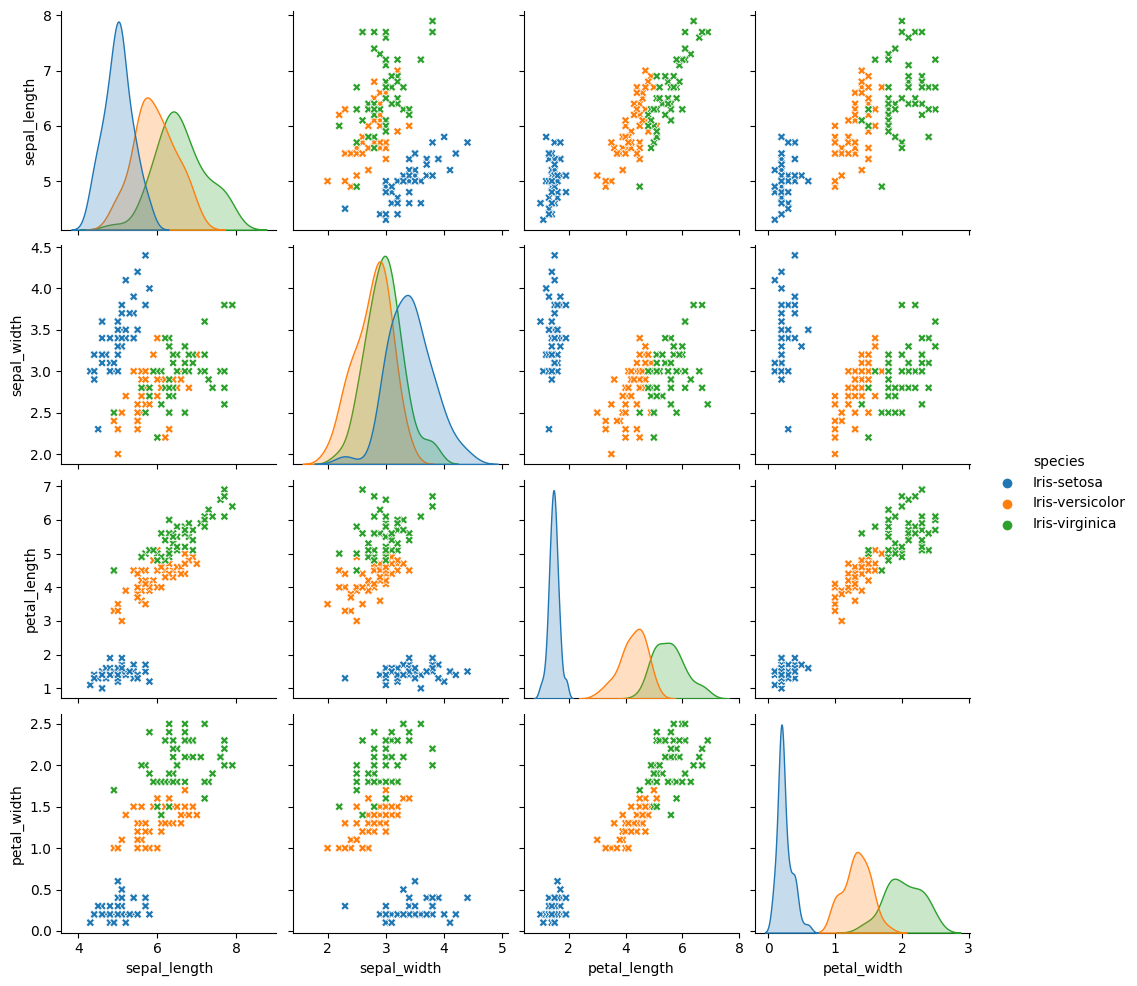

In [15]:
sns.pairplot(df,hue='species',markers='X')
plt.show()

<h> This shows that Iris-setosa is seperated from Iris-versicolor and Iris-verginica

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

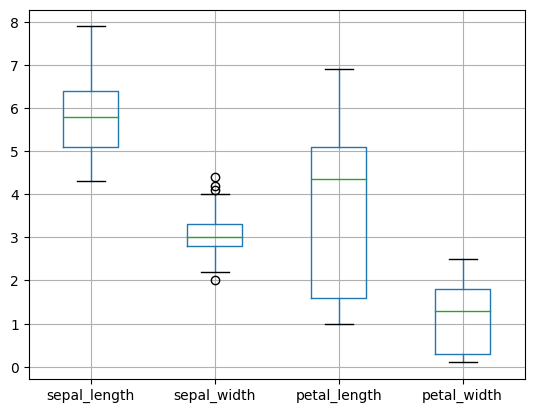

In [17]:
df.boxplot()

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

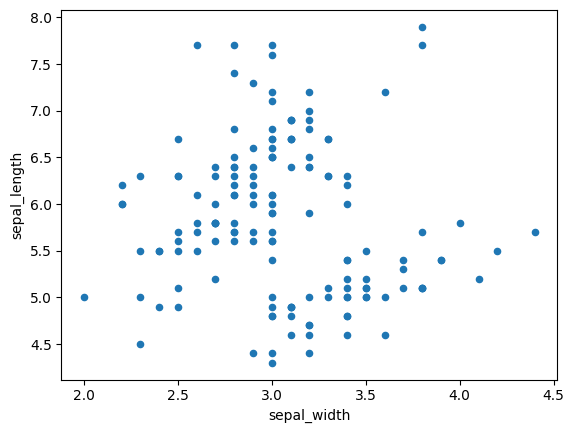

In [18]:
df.plot(x='sepal_width',y='sepal_length',kind='scatter')

<Axes: xlabel='petal_length', ylabel='sepal_length'>

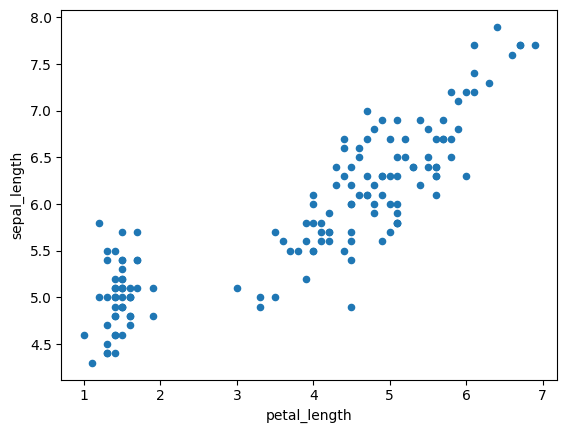

In [19]:
df.plot(x='petal_length',y='sepal_length',kind='scatter')

In [20]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace= True)

<Axes: >

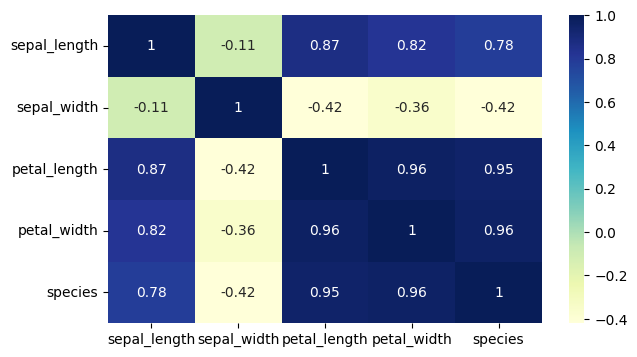

In [21]:
plt.figure(figsize = (7,4))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')

<Axes: >

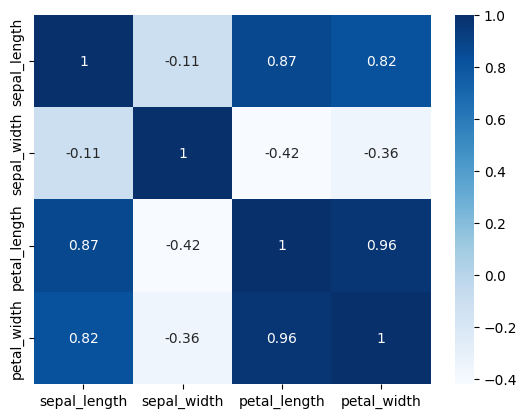

In [22]:
correlations=df.drop("species", axis=1)

# Print the correlation matrix
correlations.corr()
corr = correlations.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<h2> Splitting Dataset

<h>Now X will be the features of the flowers and Y will be the label of the flowers

In [23]:
X = df.drop("species", axis=1).values
y = df["species"].values

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

<h2> Model Training</h2>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (105, 4)
X_test (45, 4)
y_train (105,)
y_test (45,)


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model_LR = LogisticRegression()
model_LR.fit(X_train , y_train)

LogisticRegression()

In [29]:
y_pred = model_LR.predict(X_test)

In [30]:
y_pred 

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2], dtype=int64)

In [31]:
y_test[5:10]

array([2, 1, 0, 2, 1], dtype=int64)

In [32]:
y_pred[5:10]

array([2, 1, 0, 2, 1], dtype=int64)

In [33]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]], dtype=int64)

In [34]:
accuracy_LR = accuracy_score(y_test, y_pred)
precision_LR = precision_score(y_test, y_pred, average='weighted')
recall_LR = recall_score(y_test, y_pred, average='weighted')
f1_LR = f1_score(y_test, y_pred, average='weighted')

print("Overall Accuracy:", accuracy_LR)
print("Precision:", precision_LR)
print("Recall:", recall_LR)
print("F1 Score:", f1_LR)

Overall Accuracy: 0.9777777777777777
Precision: 0.9792592592592592
Recall: 0.9777777777777777
F1 Score: 0.9777493969064851


In [35]:
LR_class_report = classification_report(y_pred,y_test)
print(LR_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<h2> Saving Model</h2>

In [36]:
import pickle

# Save the trained Logistic Regression Model Classifier to a pickle file
with open('Logistic_Regression_model.pkl', 'wb') as file:
    pickle.dump(model_LR, file)